##### Copyright 2020 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Intro to Autoencoders

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/generative/autoencoder">
    <img src="https://www.tensorflow.org/images/tf_logo_32px.png" />
    View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/generative/autoencoder.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
    Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/generative/autoencoder.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />
    View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/generative/autoencoder.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This tutorial introduces autoencoders with three examples: the basics, image denoising, and anomaly detection.

An autoencoder is a special type of neural network that is trained to copy its input to its output. For example, given an image of a handwritten digit, an autoencoder first encodes the image into a lower dimensional latent representation, then decodes the latent representation back to an image. An autoencoder learns to compress the data while minimizing the reconstruction error. 

To learn more about autoencoders, please consider reading chapter 14 from [Deep Learning](https://www.deeplearningbook.org/) by Ian Goodfellow, Yoshua Bengio, and Aaron Courville.

## Import TensorFlow and other libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

## Load the dataset
To start, you will train the basic autoencoder using the Fashon MNIST dataset. Each image in this dataset is 28x28 pixels. 

In [ ]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


## First example: Basic autoencoder
![Basic autoencoder results](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/generative/images/intro_autoencoder_result.png?raw=1)

Define an autoencoder with two Dense layers: an `encoder`, which compresses the images into a 64 dimensional latent vector, and a `decoder`, that reconstructs the original image from the latent space.

To define your model, use the [Keras Model Subclassing API](https://www.tensorflow.org/guide/keras/custom_layers_and_models).


#old code (single layer)

imageSize = (28, 28)
simulateCorticalCircuit = True
firstLayerMultiplier = 2  #limited by tensorflow GPU memory
if(simulateCorticalCircuit):
  onlyTrainFinalLayer = True
  latent_dim = 64*firstLayerMultiplier #640 
else:
  onlyTrainFinalLayer = False
  latent_dim = 64 

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    if(onlyTrainFinalLayer):
      encoded = tf.stop_gradient(encoded)
    decoded = self.decoder(encoded)
    return decoded
  
autoencoder = Autoencoder(latent_dim) 

In [ ]:
imageSize = (28, 28)
multipleLayers = True
residualConnections = False
simulateCorticalCircuit = True
firstLayerMultiplier = 2  #limited by tensorflow GPU memory
if(simulateCorticalCircuit):
  onlyTrainFinalLayer = True
else:
  onlyTrainFinalLayer = False

latent_dim0 = 64
latent_dim1 = 64
latent_dim2 = 64
latent_dim3 = 64
latent_dim4 = 64
latent_dim5 = 64
latent_dim6 = 64
if(residualConnections):
  latent_dim0intermediate = latent_dim0
  latent_dim1intermediate = latent_dim1*6
  latent_dim2intermediate = latent_dim2*5
  latent_dim3intermediate = latent_dim3*4
  latent_dim4intermediate = latent_dim4*3
  latent_dim5intermediate = latent_dim5*2
  latent_dim6intermediate = latent_dim6*1
else:
  latent_dim0intermediate = latent_dim0
  latent_dim1intermediate = latent_dim1
  latent_dim2intermediate = latent_dim2
  latent_dim3intermediate = latent_dim3
  latent_dim4intermediate = latent_dim4
  latent_dim5intermediate = latent_dim5
  latent_dim6intermediate = latent_dim6
  

class AutoencoderL0(Model):
  def __init__(self, latent_dim, io_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      #layers.Dense(latent_dim, activation='relu'),
      layers.Dense(latent_dim, activation=None),
      #layers.Activation('relu'),
    ])
    #self.encoderact = tf.keras.Sequential([layers.Activation('relu'),])
    #self.encoderact = layers.Activation('relu')  
    #self.encoderactB = layers.ReLU()
    self.decoder = tf.keras.Sequential([
      layers.Dense(io_dim[0]*io_dim[1], activation='sigmoid'),
      layers.Reshape((io_dim[0], io_dim[1]))
    ])
    if(residualConnections):
      self.decodercollapseResidualConnections = tf.keras.Sequential([layers.Dense(latent_dim, activation='relu'),]) 

  def call(self, x, decodedBelow, decodedBelowAll):
    if(multipleLayers):
      encodedinput = self.encoder(x[0])
      encoded = tf.keras.layers.Average()([encodedinput, decodedBelow])
      #encoded = self.encoder0act(encoded)
    else:
      encodedinput = x
      encodedinput = self.encoder(encodedinput)
      #encodedinput = self.encoderact(encodedinput)
      #encoded = tf.keras.activations.relu(encodedinput)
      #encoded = self.encoderactB(encodedinput)
      #tf.nn.relu(encodedinput)
      encoded = encodedinput	
    if(onlyTrainFinalLayer):
      encoded = tf.stop_gradient(encoded)     
    if(residualConnections):
      encoded = tf.keras.layers.Concatenate()([encoded, decodedBelowAll) #residual connections
      encoded = self.decodercollapseResidualConnections(encoded)       
    decoded = self.decoder(encoded)
    return decoded


class AutoencoderLX(Model):
  def __init__(self, latent_dim, io_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([layers.Flatten(), layers.Dense(latent_dim, activation=None),])
    self.decoder = tf.keras.Sequential([layers.Dense(io_dim, activation='relu'),])
    self.encoderact = tf.keras.layers.Activation('relu')

  def call(self, x, decodedBelow, decodedBelowAll): 
    encodedinput = self.encoder(x[0])
    encoded = tf.keras.layers.Average()([encoded1input, decodedBelow])
    #encoded = self.encoderact(encoded)
    if(onlyTrainFinalLayer):
      encoded = tf.stop_gradient(encoded)
    if(residualConnections):
      encoded = tf.keras.layers.Concatenate()([encoded, decodedBelowAll]) #residual connections
    decoded = self.decoder(encoded)
    return decoded
  
autoencoderL0 = AutoencoderL0(latent_dim0, imageSize)
autoencoderL1 = AutoencoderLX(latent_dim1, latent_dim0)
autoencoderL2 = AutoencoderLX(latent_dim2, latent_dim1)
autoencoderL3 = AutoencoderLX(latent_dim3, latent_dim2)
autoencoderL4 = AutoencoderLX(latent_dim4, latent_dim3)
autoencoderL5 = AutoencoderLX(latent_dim5, latent_dim4)
autoencoderL6 = AutoencoderLX(latent_dim6, latent_dim5)

In [ ]:
autoencoderL0.compile(optimizer='adam', loss=losses.MeanSquaredError())
autoencoderL1.compile(optimizer='adam', loss=losses.MeanSquaredError())
autoencoderL2.compile(optimizer='adam', loss=losses.MeanSquaredError())
autoencoderL3.compile(optimizer='adam', loss=losses.MeanSquaredError())
autoencoderL4.compile(optimizer='adam', loss=losses.MeanSquaredError())
autoencoderL5.compile(optimizer='adam', loss=losses.MeanSquaredError())
autoencoderL6.compile(optimizer='adam', loss=losses.MeanSquaredError())


Train the model using `x_train` as both the input and the target. The `encoder` will learn to compress the dataset from 784 dimensions to the latent space, and the `decoder` will learn to reconstruct the original images.
.

In [ ]:
x0 = [x_train]
autoencoderL6.fit(x_train, x_train, epochs=10, shuffle=True, validation_data=(x_test, x_test))
autoencoderL5.fit(x_train, x_train, epochs=10, shuffle=True, validation_data=(x_test, x_test))
autoencoderL4.fit(x_train, x_train, epochs=10, shuffle=True, validation_data=(x_test, x_test))
autoencoderL3.fit(x_train, x_train, epochs=10, shuffle=True, validation_data=(x_test, x_test))
autoencoderL2.fit(x_train, x_train, epochs=10, shuffle=True, validation_data=(x_test, x_test))
autoencoderL1.fit(x_train, x_train, epochs=10, shuffle=True, validation_data=(x_test, x_test))
autoencoderL0.fit(x_train, x_train, epochs=10, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0512 - val_loss: 0.0310
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0259 - val_loss: 0.0225
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0207 - val_loss: 0.0194
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0186 - val_loss: 0.0180
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0176 - val_loss: 0.0173
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0170 - val_loss: 0.0168
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0166 - val_loss: 0.0166
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0164 - val_loss: 0.0164
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0162 - val_loss: 0.0163
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.016

Now that the model is trained, let's test it by encoding and decoding images from the test set.

#old code (single layer)

encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

In [ ]:
encoded_imgs = autoencoderL0.encoder(x_test).numpy()
decoded_imgs = autoencoderL0.decoder(encoded_imgs).numpy()

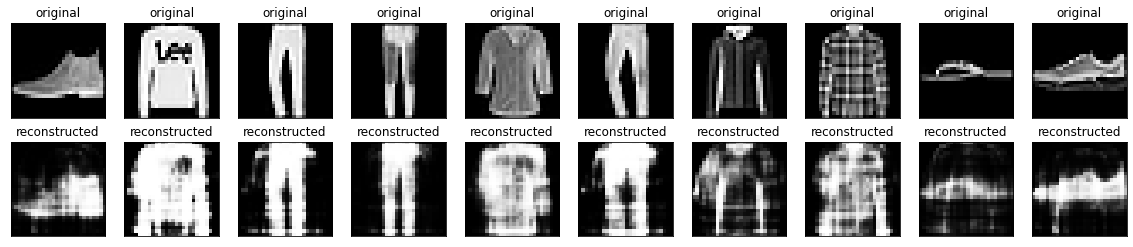

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()